In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns

In [10]:
#Load the datasets
df = pd.read_csv(r'C:\Users\arghy\Downloads\Alfido_tech\Customer_data\ecommerce_customer_data_large.csv',encoding='unicode_escape')  

**In this file we have 250000 rows and 15 column data.**

In [11]:
df.shape

(250000, 13)

**Here we see the first 10 rows of the dataset.**

In [18]:
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,2773,Credit Card,27,NaN,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.0,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,2175,Cash,27,NaN,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.0,Lauren Johnson,27,Female,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [20]:
#check for null values
pd.isnull(df).sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

**Based on the info, the 'Returns' column have missing values.**

In [21]:
#drop null values
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202618 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            202618 non-null  int64  
 1   Purchase Date          202618 non-null  object 
 2   Product Category       202618 non-null  object 
 3   Product Price          202618 non-null  int64  
 4   Quantity               202618 non-null  int64  
 5   Total Purchase Amount  202618 non-null  int64  
 6   Payment Method         202618 non-null  object 
 7   Customer Age           202618 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          202618 non-null  object 
 10  Age                    202618 non-null  int64  
 11  Gender                 202618 non-null  object 
 12  Churn                  202618 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 21.6+ MB


In [23]:
pd.isnull(df).sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

**Now we clearly see that any null have not present here.**

In [26]:
#Convert Purchase Date to datetime currently object, must be datetime.
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202618 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202618 non-null  int64         
 1   Purchase Date          202618 non-null  datetime64[ns]
 2   Product Category       202618 non-null  object        
 3   Product Price          202618 non-null  int64         
 4   Quantity               202618 non-null  int64         
 5   Total Purchase Amount  202618 non-null  int64         
 6   Payment Method         202618 non-null  object        
 7   Customer Age           202618 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          202618 non-null  object        
 10  Age                    202618 non-null  int64         
 11  Gender                 202618 non-null  object        
 12  Churn                  202618 non-null  int64    

In [27]:
#Convert Customer ID to string
df['Customer ID'] = df['Customer ID'].astype(str)

In [28]:
#Normalize categorical text columns
#Product Category: remove spaces, lowercase
#Payment Method: unify spellings
#Gender: standardize to "Male" / "Female"

df['Product Category'] = df['Product Category'].str.strip().str.lower()
df['Payment Method'] = df['Payment Method'].str.strip().str.title()
df['Gender'] = df['Gender'].str.strip().str.capitalize()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202618 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202618 non-null  object        
 1   Purchase Date          202618 non-null  datetime64[ns]
 2   Product Category       202618 non-null  object        
 3   Product Price          202618 non-null  float64       
 4   Quantity               202618 non-null  int64         
 5   Total Purchase Amount  202618 non-null  int64         
 6   Payment Method         202618 non-null  object        
 7   Customer Age           202618 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          202618 non-null  object        
 10  Age                    202618 non-null  int64         
 11  Gender                 202618 non-null  object        
 12  Churn                  202618 non-null  int64    

In [40]:
#Handle duplicate Age columns(basically I already have Customer Age and Age → drop one).
df = df.drop(columns=['Age'], errors='ignore')

In [49]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn
0,44605,2023-05-03 21:30:02,home,177.0,1,177,Paypal,31,1.0,John Rivera,Female,False
1,44605,2021-05-16 13:57:44,electronics,174.0,3,522,Paypal,31,1.0,John Rivera,Female,False
2,44605,2020-07-13 06:16:57,books,413.0,1,413,Credit Card,31,1.0,John Rivera,Female,False
3,44605,2023-01-17 13:14:36,electronics,396.0,3,1188,Cash,31,0.0,John Rivera,Female,False
4,44605,2021-05-01 11:29:27,books,259.0,4,1036,Paypal,31,1.0,John Rivera,Female,False


In [32]:
#Convert Product Price to float
df['Product Price'] = df['Product Price'].astype(float)

In [41]:
#We use this to remove invalid rows where purchase quantity is zero or negative.
df = df[df['Quantity'] > 0]

In [43]:
# shows all rows with 0 or negative quantity
df[df['Quantity'] <= 0]   

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn


**It is returns an empty dataframe, it means the data has no invalid quantities.**

In [45]:
#Now check we use this code to ensure Total Purchase Amount is consistent with (Product Price × Quantity) and fix any data entry errors.
df['Total Purchase Amount Check'] = df['Product Price'] * df['Quantity']
df.loc[df['Total Purchase Amount'] != df['Total Purchase Amount Check'], 'Total Purchase Amount'] = df['Total Purchase Amount Check']
df = df.drop(columns=['Total Purchase Amount Check'])

In [47]:
# Count how many rows have mismatched Total Purchase Amount compared to Product Price × Quantity
(df['Total Purchase Amount'] != df['Product Price'] * df['Quantity']).sum()

np.int64(0)

**The result is 0, then the code worked and all values are now consistent.**

In [48]:
#We use this code to clearly represent customer churn as True/False or boolean instead of numbers 0/1, making the data easier to interpret.
df['Churn'] = df['Churn'].astype(bool)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202618 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202618 non-null  object        
 1   Purchase Date          202618 non-null  datetime64[ns]
 2   Product Category       202618 non-null  object        
 3   Product Price          202618 non-null  float64       
 4   Quantity               202618 non-null  int64         
 5   Total Purchase Amount  202618 non-null  int64         
 6   Payment Method         202618 non-null  object        
 7   Customer Age           202618 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          202618 non-null  object        
 10  Gender                 202618 non-null  object        
 11  Churn                  202618 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(

In [51]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn
0,44605,2023-05-03 21:30:02,home,177.0,1,177,Paypal,31,1.0,John Rivera,Female,False
1,44605,2021-05-16 13:57:44,electronics,174.0,3,522,Paypal,31,1.0,John Rivera,Female,False
2,44605,2020-07-13 06:16:57,books,413.0,1,413,Credit Card,31,1.0,John Rivera,Female,False
3,44605,2023-01-17 13:14:36,electronics,396.0,3,1188,Cash,31,0.0,John Rivera,Female,False
4,44605,2021-05-01 11:29:27,books,259.0,4,1036,Paypal,31,1.0,John Rivera,Female,False


<h1 style="font-size:35px; color:black;">Explolatory Data Analysis(EDA)</h1>


<h1 style="font-size:25px; color:black;">Univariate Analysis</h1>

<h1 style="font-size:25px; color:black;">(Distribution of single variables)</h1>

<h1 style="font-size:20px; color:black; text-align:center;">Customer Age</h1>

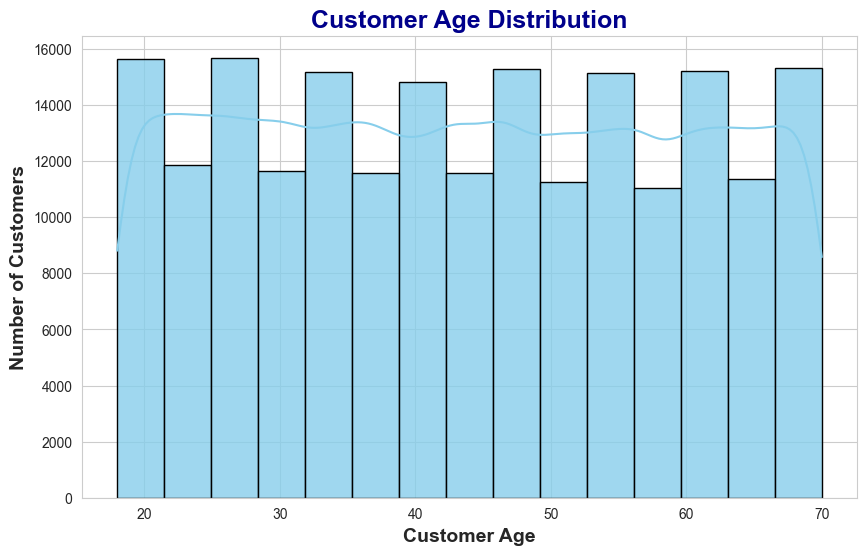

 Summary of Customer Age:



,Customer Age Stats
count,202618.000000
mean,43.817923
std,15.356067
min,18.000000
25%,30.000000
50%,44.000000
75%,57.000000
max,70.000000


In [66]:
# Set style
sns.set_style("whitegrid")

# Bigger figure
plt.figure(figsize=(10,6))

# Attractive histogram
sns.histplot(df['Customer Age'], bins=15, kde=True, color="skyblue", edgecolor="black", alpha=0.8)

# Titles and labels
plt.title("Customer Age Distribution", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Customer Age", fontsize=14, fontweight="bold")
plt.ylabel("Number of Customers", fontsize=14, fontweight="bold")

# Show plot
plt.show()

# Summary statistics
age_summary = df['Customer Age'].describe().to_frame().rename(columns={'Customer Age':'Customer Age Stats'})
print(" Summary of Customer Age:\n")
display(age_summary)

**The customer age distribution appears fairly uniform across different age groups, with the majority concentrated between 20 and 60 years, reflecting a balanced customer base. Notably, there are slight peaks in the 20–30 and 40–50 age ranges, indicating higher engagement among these segments. In contrast, customers below 20 and above 70 are relatively underrepresented, suggesting limited participation from the extreme age groups.**

<h1 style="font-size:20px; color:black; text-align:center;">Gender</h1>

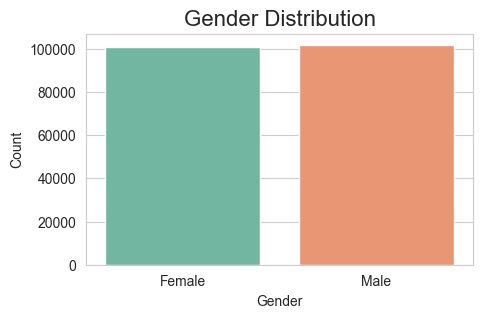

Gender counts:


Gender
Male      101919
Female    100699
Name: count, dtype: int64

In [65]:
plt.figure(figsize=(5,3))
sns.countplot(x="Gender", data=df, hue="Gender", palette="Set2", legend=False)
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("Gender counts:")
display(df['Gender'].value_counts())

**The data has almost the same number of male and female customers. This is good because it means the data is balanced, and we can study customer behavior without one gender being too high or too low.**

<h1 style="font-size:20px; color:black; text-align:center;">Product Category</h1>

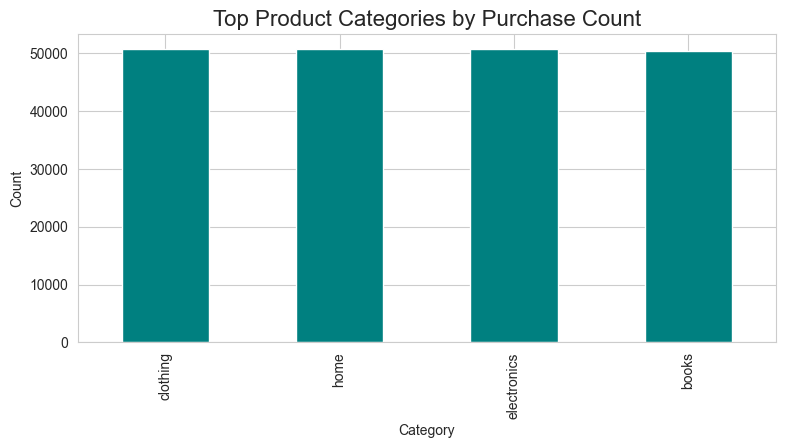

Product Category
clothing       50754
home           50741
electronics    50704
books          50419
Name: count, dtype: int64

In [70]:
plt.figure(figsize=(9,4))
df['Product Category'].value_counts().head(20).plot(kind='bar', color="teal")
plt.title("Top Product Categories by Purchase Count", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

display(df['Product Category'].value_counts())

**The data shows that clothing, home, electronics, and books are the most popular product categories, and each of them has almost the same number of purchases (around 50,000 each). This means customers are shopping across different product types in a balanced way, without one category being much higher or lower than the others.**

<h1 style="font-size:20px; color:black; text-align:center;">Payment Method</h1>

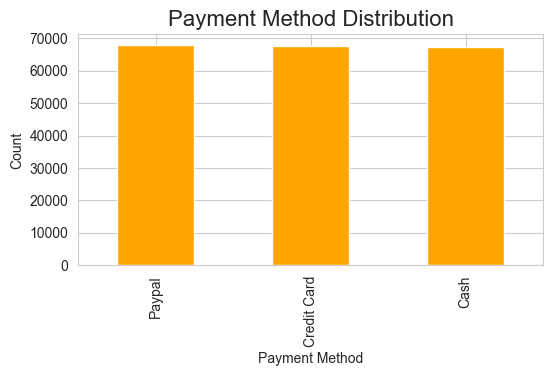

Payment Method
Paypal         67811
Credit Card    67517
Cash           67290
Name: count, dtype: int64

In [72]:
plt.figure(figsize=(6,3))
df['Payment Method'].value_counts().plot(kind='bar', color="orange")
plt.title("Payment Method Distribution", fontsize=16)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

display(df['Payment Method'].value_counts())

**The data shows that customers use all three payment methods—PayPal, credit card, and cash—almost equally, with each method having around 67k transactions. This means no single payment method dominates, and customers have a balanced preference across different payment options.**

<h1 style="font-size:25px; color:black;">Bivariate Analysis</h1>

<h1 style="font-size:20px; color:black;">(Relationships between variables)</h1>

<h1 style="font-size:20px; color:black; text-align:center;">Churn by Gender</h1>


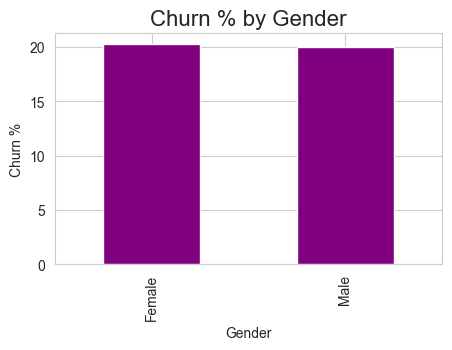

Gender
Female    20.22
Male      20.00
Name: Churn, dtype: float64

In [74]:
if 'Churn' in df.columns:
    churn_by_gender = df.groupby('Gender')['Churn'].mean() * 100
    churn_by_gender.plot(kind='bar', figsize=(5,3), color="purple")
    plt.title("Churn % by Gender", fontsize=16)
    plt.ylabel("Churn %")
    plt.show()
    display(churn_by_gender.round(2))

**The churn (customer attrition) rate is almost the same for both genders, with females at about 20.22% and males at about 20%. This shows that gender does not play a big role in customer churn (attrition), as both groups leave at nearly the same rate.**

<h1 style="font-size:20px; color:black; text-align:center;">Churn by Product Category</h1>

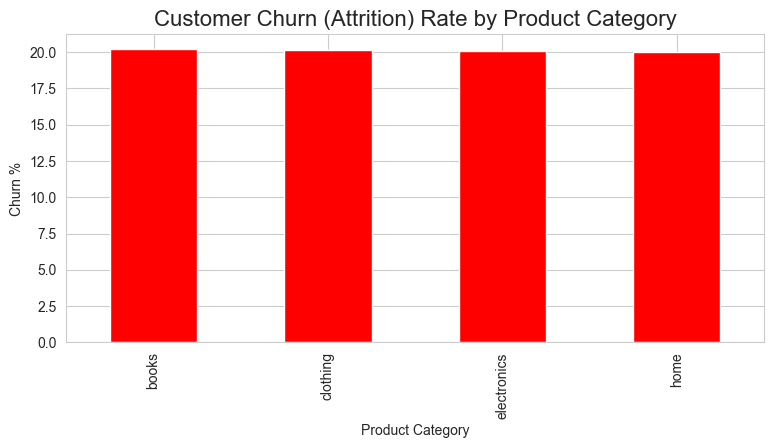

Product Category
books          20.21
clothing       20.13
electronics    20.11
home           19.99
Name: Churn, dtype: float64

In [76]:
if 'Churn' in df.columns:
    churn_by_cat = df.groupby('Product Category')['Churn'].mean().sort_values(ascending=False) * 100
    churn_by_cat.head(10).plot(kind='bar', figsize=(9,4), color="red")
    plt.title("Customer Churn (Attrition) Rate by Product Category", fontsize=16)
    plt.ylabel("Churn %")
    plt.show()
    display(churn_by_cat.head(10).round(2))


**The churn (customer attrition) rate across the top product categories is almost the same, with books (20.21%), clothing (20.13%), electronics (20.11%), and home (19.99%). This means customers are leaving at a very similar rate no matter which category they buy from, showing that product category is not a strong factor in churn (customer attrition).**

<h1 style="font-size:20px; color:black; text-align:center;">Returns vs Churn</h1>

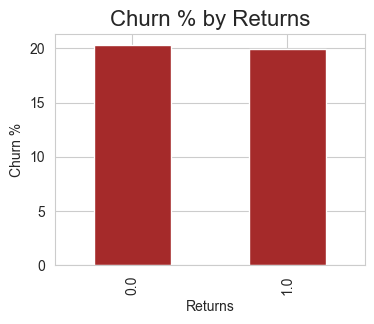

Returns
0.0    20.27
1.0    19.95
Name: Churn, dtype: float64

In [79]:
if 'Returns' in df.columns and 'Churn' in df.columns:
    churn_return = df.groupby('Returns')['Churn'].mean()*100
    churn_return.plot(kind='bar', color="brown", figsize=(4,3))
    plt.title("Churn % by Returns", fontsize=16)
    plt.ylabel("Churn %")
    plt.show()
    display(churn_return.round(2))

**The churn (customer attrition) rate is very close between customers who return products and those who do not. Customers who did not make returns have a churn (customer attrition) rate of 20.27%, while those who made returns have a churn rate of 19.95%. This shows that product returns do not have a big effect on whether customers leave or stay.**

<h1 style="font-size:20px; color:black; text-align:center;">Payment method vs Churn</h1>

Churn % by Payment Method:


Payment Method
Credit Card    19.73
Cash           20.29
Paypal         20.30
Name: Churn, dtype: float64

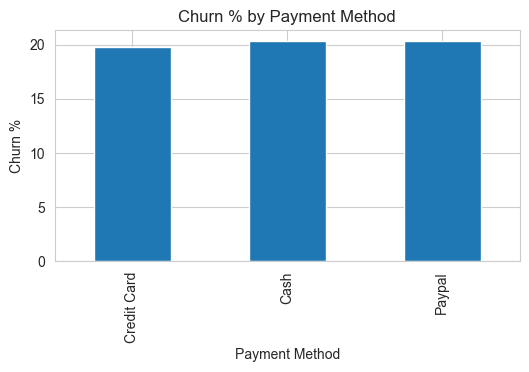

In [80]:
if 'Payment Method' in df.columns and 'Churn' in df.columns:
    pm_churn = df.groupby('Payment Method')['Churn'].mean().multiply(100).sort_values()
    print("Churn % by Payment Method:")
    display(pm_churn.round(2))
    plt.figure(figsize=(6,3))
    pm_churn.plot(kind='bar')
    plt.title('Churn % by Payment Method')
    plt.ylabel('Churn %')
    plt.show()

**The churn (customer attrition) rate is slightly different across payment methods. Customers who paid with credit cards have the lowest churn (customer attrition) rate at 19.73%, while those who used cash (20.29%) or PayPal (20.30%) have a slightly higher churn rate. This suggests that customers using credit cards are a little more likely to stay compared to others, but overall the payment method does not make a very big difference in churn.**

<h1 style="font-size:20px; color:black; text-align:center;">Quantity vs Churn</h1>


Churn % by Quantity:


Quantity
1    20.12
2    20.21
3    20.27
4    20.10
5    19.85
Name: Churn, dtype: float64

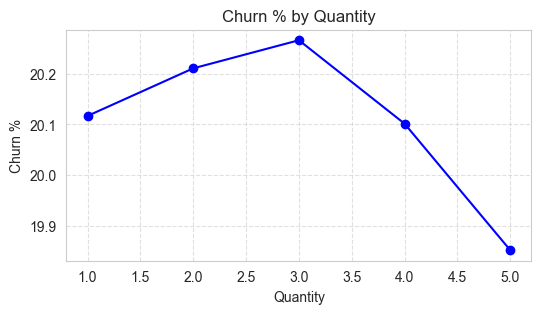

In [83]:
if 'Quantity' in df.columns and 'Churn' in df.columns:
    q_churn = df.groupby('Quantity')['Churn'].mean().multiply(100)
    print("Churn % by Quantity:")
    display(q_churn.round(2))

    plt.figure(figsize=(6,3))
    plt.plot(q_churn.index, q_churn.values, marker='o', linestyle='-', color='blue')
    plt.title('Churn % by Quantity')
    plt.xlabel('Quantity')
    plt.ylabel('Churn %')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

**The churn (customer attrition) rate is almost the same across different quantities, staying around 20%. Customers who purchased 3 items had the highest churn (20.27%), while those who bought 5 items had the lowest churn (19.85%). Overall, the number of items purchased does not strongly affect churn (customer attrition).**


<h1 style="font-size:25px; color:black;">Time-based analysis</h1>

In [84]:
# create time features
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Weekday'] = df['Purchase Date'].dt.day_name()

<h1 style="font-size:20px; color:black; text-align:center;">Monthly revenue trend</h1>

Monthly revenue (first 6 rows):


Purchase Date
2020-01-31    3491060
2020-02-29    3269782
2020-03-31    3571206
2020-04-30    3478094
2020-05-31    3580271
2020-06-30    3470760
Freq: ME, Name: Total Purchase Amount, dtype: int64

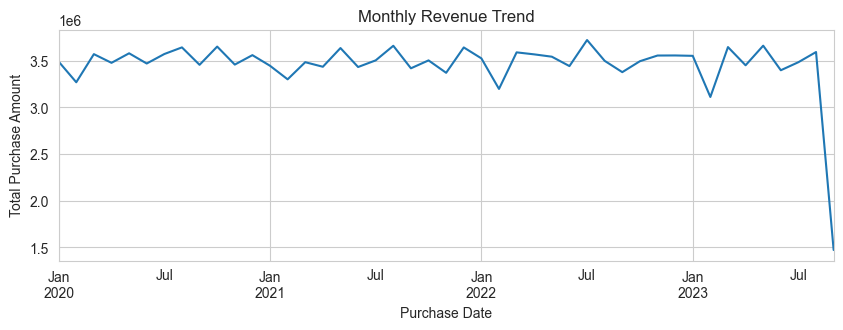

In [86]:
# Ensure Purchase Date is in datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Resample monthly using 'ME' (month-end)
monthly_revenue = df.set_index('Purchase Date')['Total Purchase Amount'].resample('ME').sum()

print("Monthly revenue (first 6 rows):")
display(monthly_revenue.head(6))

# Plot monthly revenue trend
plt.figure(figsize=(10,3))
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Purchase Date')
plt.show()

**The monthly revenue trend shows that sales remained fairly stable around 3.4M–3.6M over time, with small ups and downs. The sharp drop at the end is likely due to incomplete data for the last month rather than a real fall in revenue. Overall, the business has maintained steady performance without big growth or decline.**

<h1 style="font-size:20px; color:black; text-align:center;">Monthly churn % trend</h1>

Monthly churn % (first 6 rows):


Purchase Date
2020-01-31    19.809276
2020-02-29    20.254925
2020-03-31    19.651795
2020-04-30    20.651451
2020-05-31    19.661960
2020-06-30    19.897046
Freq: ME, Name: Churn, dtype: float64

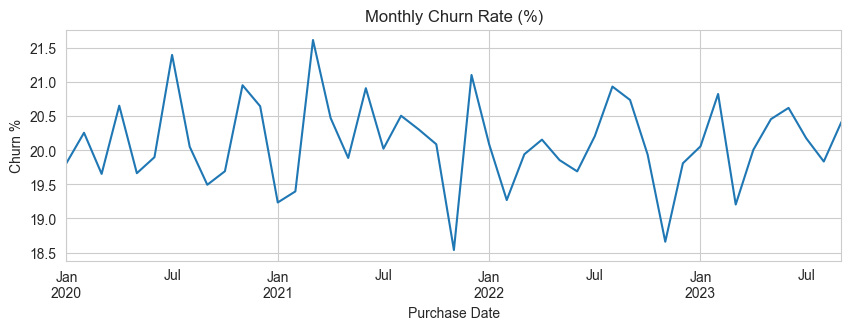

In [88]:
if 'Churn' in df.columns:
    monthly_churn = df.set_index('Purchase Date')['Churn'].resample('ME').mean().multiply(100)
    print("Monthly churn % (first 6 rows):")
    display(monthly_churn.head(6))
    plt.figure(figsize=(10,3))
    monthly_churn.plot()
    plt.title('Monthly Churn Rate (%)')
    plt.ylabel('Churn %')
    plt.show()

**The monthly churn (customer attrition) rate stays steady around 20% with minor ups and downs, showing no clear seasonal pattern. This means the business keeps attracting new customers but should work on reducing customer loss.**

<h1 style="font-size:25px; color:black;">RFM analysis</h1>

<h1 style="font-size:20px; color:black; text-align:center;">Customer-level (Recency/Frequency/Monetary)</h1>

In [90]:
# reference date for recency = max purchase date in dataset
ref_date = df['Purchase Date'].max()

rfm = df.groupby('Customer ID').agg({
    'Purchase Date': lambda x: (ref_date - x.max()).days,
    'Customer ID': 'count',
    'Total Purchase Amount': 'sum'
}).rename(columns={'Purchase Date':'RecencyDays', 'Customer ID':'Frequency', 'Total Purchase Amount':'Monetary'}).reset_index()

print("RFM head:")
display(rfm.head())

print("RFM summary stats:")
display(rfm[['RecencyDays','Frequency','Monetary']].describe())

# create simple quartile segments
rfm['R_quartile'] = pd.qcut(rfm['RecencyDays'], 4, labels=[4,3,2,1])  # lower recency better → invert
rfm['F_quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_quartile'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Score'] = rfm['R_quartile'].astype(int) + rfm['F_quartile'].astype(int) + rfm['M_quartile'].astype(int)

print("Top RFM customers:")
display(rfm.sort_values('RFM_Score', ascending=False).head(10))

RFM head:


,Customer ID,RecencyDays,Frequency,Monetary
0,1,888,1,2280
1,10,130,8,6693
2,100,22,6,6297
3,1000,187,4,972
4,10000,84,5,3881


RFM summary stats:


,RecencyDays,Frequency,Monetary
count,49146.000000,49146.000000,49146.000000
mean,310.446588,4.122777,3164.031579
std,281.331150,1.947856,1913.909842
min,0.000000,1.000000,10.000000
25%,94.000000,3.000000,1720.000000
50%,226.000000,4.000000,2893.000000
75%,447.000000,5.000000,4305.000000
max,1351.000000,14.000000,14119.000000


Top RFM customers:


,Customer ID,RecencyDays,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
2,100,22,6,6297,4,4,4,12
7900,17235,87,6,6815,4,4,4,12
49116,9970,84,6,5206,4,4,4,12
25089,32969,91,9,4314,4,4,4,12
49126,9980,41,8,5461,4,4,4,12
59,10051,68,6,4314,4,4,4,12
58,10050,49,7,5646,4,4,4,12
49090,9947,51,8,5960,4,4,4,12
35979,42941,8,9,4475,4,4,4,12
25036,32919,69,7,5491,4,4,4,12


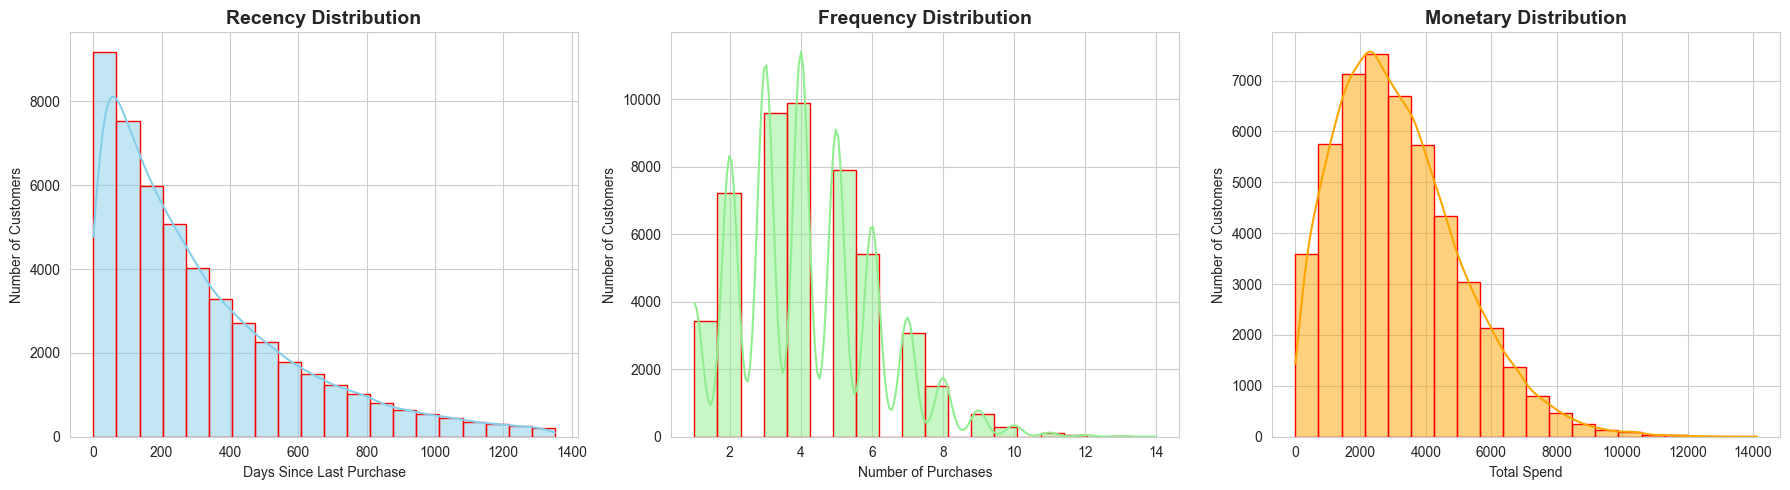

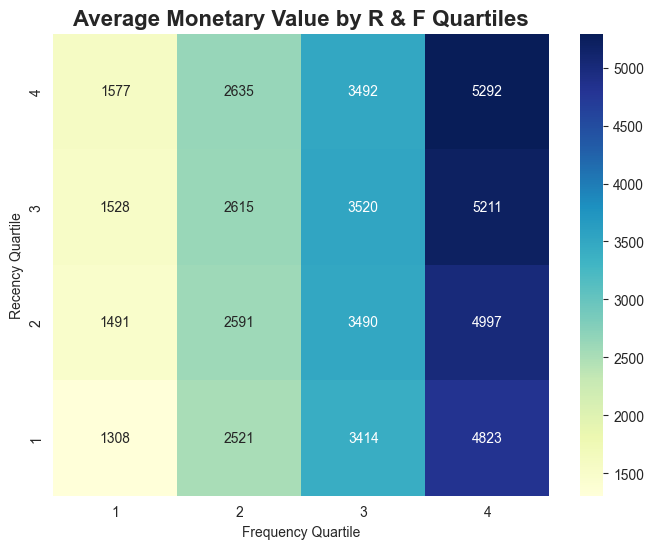

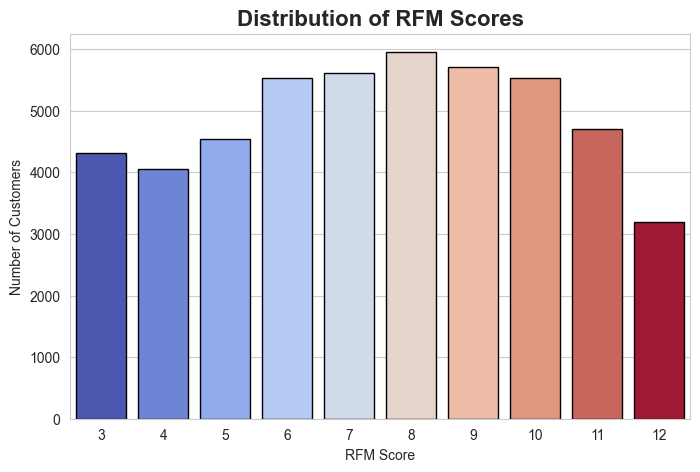

In [95]:
# Distribution plots for R, F, M

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(rfm['RecencyDays'], bins=20, kde=True, ax=axes[0], color="skyblue", edgecolor="red")
axes[0].set_title("Recency Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Days Since Last Purchase")
axes[0].set_ylabel("Number of Customers")

sns.histplot(rfm['Frequency'], bins=20, kde=True, ax=axes[1], color="lightgreen", edgecolor="red")
axes[1].set_title("Frequency Distribution", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Number of Purchases")
axes[1].set_ylabel("Number of Customers")

sns.histplot(rfm['Monetary'], bins=20, kde=True, ax=axes[2], color="orange", edgecolor="red")
axes[2].set_title("Monetary Distribution", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Total Spend")
axes[2].set_ylabel("Number of Customers")

plt.tight_layout()
plt.show()



# Heatmap of RFM quartiles (customer segmentation)

rfm_pivot = rfm.pivot_table(index="R_quartile", 
                            columns="F_quartile", 
                            values="Monetary", 
                            aggfunc="mean", 
                            observed=False)  
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Monetary Value by R & F Quartiles", fontsize=16, fontweight="bold")
plt.xlabel("Frequency Quartile")
plt.ylabel("Recency Quartile")
plt.show()


# RFM Score distribution

plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x="RFM_Score", hue="RFM_Score", palette="coolwarm", edgecolor="black", legend=False)  
plt.title("Distribution of RFM Scores", fontsize=16, fontweight="bold")
plt.xlabel("RFM Score")
plt.ylabel("Number of Customers")
plt.show()

**The RFM (Recency, Frequency, Monetary) analysis shows that most customers made their last purchase within 300 days, with fewer active after 1 year. Purchase frequency is generally low, as most customers buy between 3–5 times, but a small group buys much more often. Spending is also skewed—most customers spend around 2000–4000, while a few spend very high amounts. The heatmap shows that customers who buy more often and recently also spend more, making them highly valuable. The RFM score distribution highlights that many customers fall in the mid-to-high range (6–10), and top customers with the highest score (12) buy frequently, spend more, and are very recent buyers.**

<h1 style="font-size:25px; color:black;"> Key insights calculations & quick tables</h1>

In [97]:
# --- Top product categories by revenue ---
top_by_revenue = (
    df.groupby('Product Category')['Total Purchase Amount']
    .sum()
    .sort_values(ascending=False)
)

print("Top product categories by revenue:")
display(top_by_revenue.head(10))


# --- Returns impact on churn ---
if 'Returns' in df.columns and 'Churn' in df.columns:
    churn_returners = df[df['Returns'] == 1]['Churn'].mean() * 100
    churn_nonreturners = df[df['Returns'] == 0]['Churn'].mean() * 100
    
    print(f"Churn rate among returners: {churn_returners:.2f}%")
    print(f"Churn rate among non-returners: {churn_nonreturners:.2f}%")


# --- Age groups spending and churn ---
age_bins = [18, 30, 45, 60, 100]
df['AgeGroup'] = pd.cut(
    df['Customer Age'],
    bins=age_bins,
    labels=['18-30', '31-45', '46-60', '60+']
)
spend_age = df.groupby('AgeGroup', observed=False)['Total Purchase Amount'].sum()
churn_age = df.groupby('AgeGroup', observed=False)['Churn'].mean().multiply(100)

print("Spend by age group:")
display(spend_age)

print("Churn % by age group:")
display(churn_age.round(2))


# --- High-value customers churn (top 10% by monetary) ---
cust_monetary = rfm.set_index('Customer ID')['Monetary']
threshold = cust_monetary.quantile(0.90)
top10 = cust_monetary[cust_monetary >= threshold].index

hv_churn = df[df['Customer ID'].isin(top10)]['Churn'].mean() * 100

print(f"High-value (top10%) customer churn: {hv_churn:.2f}%")
print(f"Overall churn: {df['Churn'].mean() * 100:.2f}%")


Top product categories by revenue:


Product Category
home           39119596
clothing       39069086
electronics    38754081
books          38556733
Name: Total Purchase Amount, dtype: int64

Churn rate among returners: 19.95%
Churn rate among non-returners: 20.27%
Spend by age group:


AgeGroup
18-30    36244966
31-45    43630096
46-60    43360032
60+      29333571
Name: Total Purchase Amount, dtype: int64

Churn % by age group:


AgeGroup
18-30    20.77
31-45    19.58
46-60    19.77
60+      20.64
Name: Churn, dtype: float64

High-value (top10%) customer churn: 20.51%
Overall churn: 20.11%


<h1 style="font-size:40px; color:black; text-align:center;">Overall Insight</h1>

Churn (customer attrition) is stable at ~20% across most segments, with little difference by product type, spending level, or return behavior. Middle-aged customers (31–60) drive the most revenue and show the lowest churn, making them the most valuable segment. Future strategies **should focus on retaining young and older customers** while strengthening engagement programs even for high-value customers, since spending does not guarantee loyalty.